![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)
# **Face and Eye Detection with Haar Cascade Classifiers**

####**In this lesson we'll learn:**
1. To use a Haarcascade Classifer to detect faces
2. To use a Haarcascade Classifer to detect eyes
3. To use a Haarcascade Classifer to detect faces and eyes from your webcam in Colab


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq images.zip
!unzip -qq haarcascades.zip

--2023-08-25 00:53:26--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.144.18, 52.95.143.106, 3.5.245.117, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.144.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  17.8MB/s    in 1.6s    

2023-08-25 00:53:29 (17.8 MB/s) - ‘images.zip’ saved [29586716/29586716]

--2023-08-25 00:53:29--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.144.18, 52.95.143.106, 3.5.245.117, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.

## **Simple Face Detection using Haarcascade Classifiers**

### **Firstly, What is Object Detection?**

![](https://miro.medium.com/max/739/1*zlWrCk1hBBFRXa5t84lmHQ.jpeg)

**Object Detection** is the ability to detect and classify individual objects in an image and draw a bounding box over the object's area.

## **HAAR Cascade Classifiers**

Developed by Viola and Jones in 2001.

An object detection method that uses a series of classifiers (cascade) to identify objects in an image. They are trained to identify one type of object, however, we can use several of them in parallel e.g. detecting eyes and faces together. HAAR Classifiers are trained using lots of positive images (i.e. images with the object present) and negative images (i.e. images without the object present).
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/haar.png)



<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-2-cf55d5384095>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


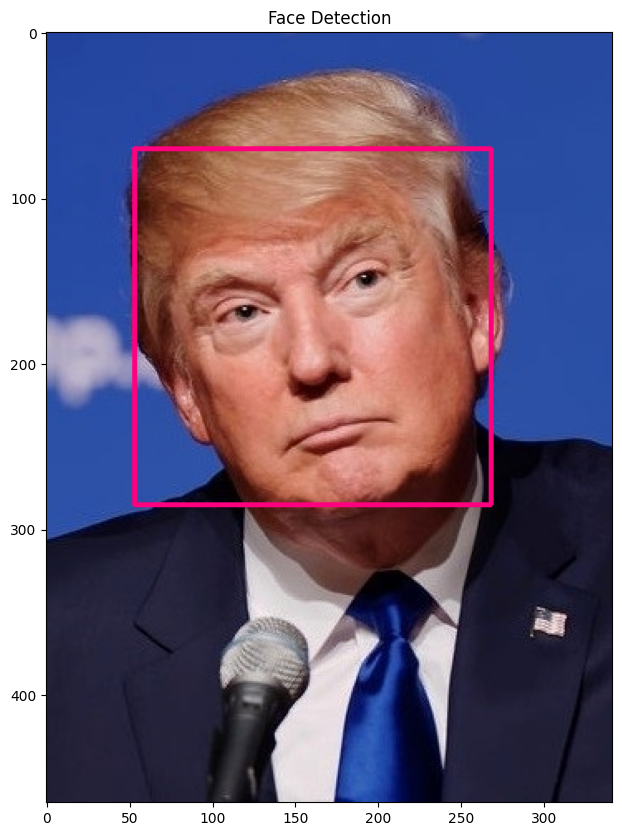

In [2]:
# We point OpenCV's CascadeClassifier function to where our
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)

imshow('Face Detection', image)

## **Simple Eye & Face Detection using Haarcascade Classifiers**

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-3-1c836a328eb8>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


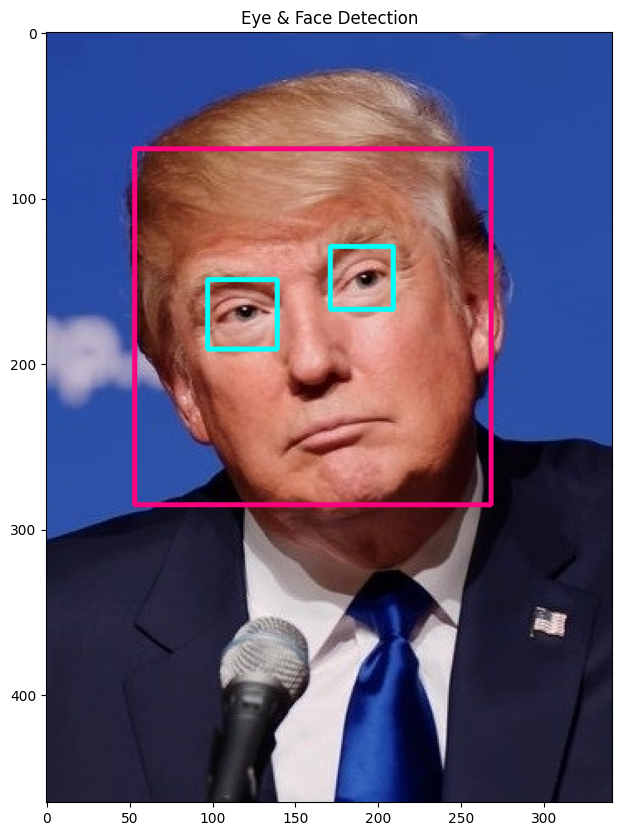

In [3]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

img = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.2, 3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)

## **Using Colab's Code Snippets let's access the webcam for an input**

Note: Requires your computer to have a webcam

In [4]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


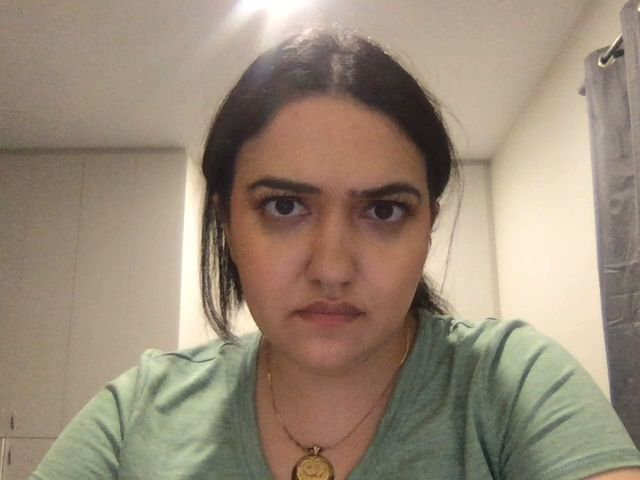

In [5]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-6-c1a4d7c852ea>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


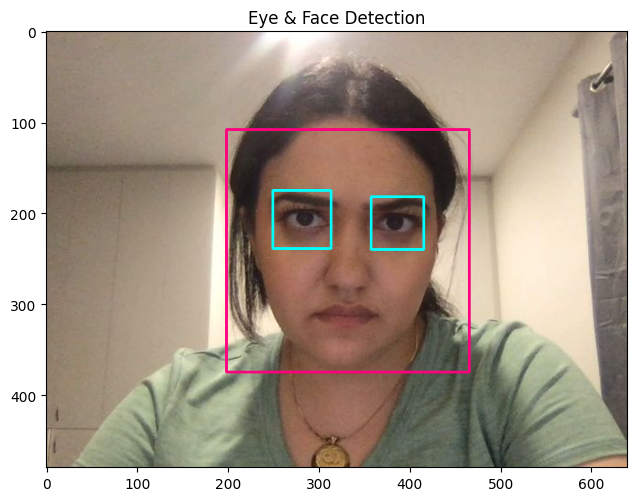

In [6]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

img = cv2.imread('photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)

### **Bonus Code - Use your webcam to do live face and eye detection**

This only works on a local machine, will not work in Colab

In [7]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img

    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)

        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-7-0e82871573b8>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


error: ignored